In [2]:
import os
import numpy as np
import pandas as pd

In [ ]:
pip install tensorflow
pip install keras
pip install scikeras

In [2]:
import tensorflow

In [9]:
tensorflow.__version__

'2.15.0'

In [4]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
#from keras.utils import np_utils
from keras import optimizers

In [7]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np

In [76]:
seed = 10
np.random.seed(seed)

In [77]:
import pandas as pd
dataframe = pd.read_csv("sonar.csv", header=None)

In [78]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [79]:
type(dataframe)

pandas.core.frame.DataFrame

In [80]:
dataframe[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [81]:
dataset = dataframe.values

In [82]:
dataset

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [83]:
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

In [21]:
X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [22]:
Y

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

Codificar a variável classe como inteiro

In [84]:
encoder = LabelEncoder()

In [85]:
encoder.fit(Y)

LabelEncoder()

In [86]:
encoded_Y = encoder.transform(Y)

In [33]:
encoded_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
model = Sequential()

In [88]:
model

In [89]:
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model.add(Dense(30, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [37]:
model

In [90]:
# Compilar Modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5811 (22.70 KB)
Trainable params: 5811 (22.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
estimator = KerasClassifier(build_fn=model, epochs=10, batch_size=5, verbose=1)

In [92]:
estimator

KerasClassifier(
	model=None
	build_fn=<keras.src.engine.sequential.Sequential object at 0x000001F6284CFCD0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [93]:
def create_baseline():
    # Criar Modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compilar Modelo
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [94]:
create_baseline()

Avaliar Modelo com a Base de dados

**OBS1.:** Epoch: Uma época é uma completa apresentação da base de dados para o modelo

**OBS2.:** Batch_size: Amostras enviadas ao modelo

In [95]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=10, batch_size=5, verbose=1)

In [46]:
estimator

KerasClassifier(
	model=None
	build_fn=<function create_baseline at 0x000001F618454CC0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [96]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, encoded_Y, cv=kfold)

Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5134
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5508
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.5615
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6526 - accuracy: 0.6471
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.6952
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.6791
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7433
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5238 - accuracy: 0.7380
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 3s 2ms/step - loss: 0.6929 - accuracy: 0.5455
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6823 - accuracy: 0.5936
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.5936
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.6791
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7487
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7380
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7807
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8235
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5187
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5561
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.6310
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6898
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5377 - accuracy: 0.7540
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7380
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.7807
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5348
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6831 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6610 - accuracy: 0.6203
Epoch 5/10
38/38 [==============================] - 0s 3ms/step - loss: 0.6244 - accuracy: 0.6684
Epoch 6/10
38/38 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7326
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.7540
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7647
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8021
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5348
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5561
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6576 - accuracy: 0.5936
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6063 - accuracy: 0.6898
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7701
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7594
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.4332 - accuracy: 0.7968
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8128
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 2ms/step - loss: 0.6932 - accuracy: 0.4545
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5508
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6720 - accuracy: 0.6096
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7112
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.7487
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7807
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7701
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5027
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.5936
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6273 - accuracy: 0.6898
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7380
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7487
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7701
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5401
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5294
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.6738
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.6417
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.6952
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7433
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5123 - accuracy: 0.7647
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7701
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7433
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5213
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5319
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5319
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5691
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.6809
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5622 - accuracy: 0.7553
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.7713
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.7713
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8298
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


38/38 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5319
Epoch 2/10
38/38 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5319
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5319
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.5319
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.5585
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6915
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7660
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7447
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7553
Epoch 10/10
4/4 [==============================] - 0s 2ms/step


In [97]:
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Results: 77.33% (9.76%)


In [99]:
import matplotlib.pyplot as plt

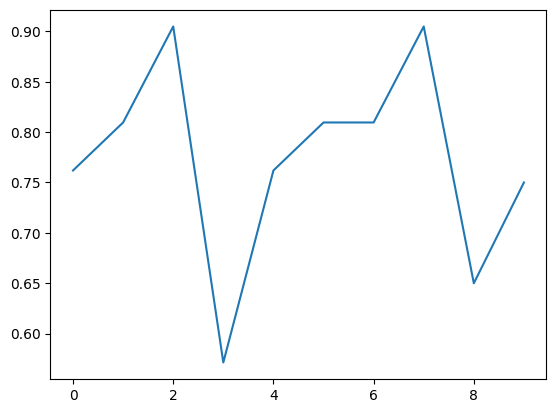

In [100]:
plt.plot(results) #Modelo com tendência negativa

In [50]:
def alicia(ali):
    y = 10*ali
    j = ali/20
    return (y,j)

In [51]:
duda, nanda = alicia(5)

In [ ]:
duda

50

In [ ]:
nanda

0.25

In [101]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, encoded_Y, test_size=0.20, random_state=seed)
X_train_s, X_test_s, Y_train_s, Y_test_s = model_selection.train_test_split(X, Y, test_size=0.20, random_state=seed)

In [102]:
X_test

array([[0.0225, 0.0019, 0.0075, ..., 0.0035, 0.0021, 0.0027],
       [0.0067, 0.0096, 0.0024, ..., 0.0034, 0.0051, 0.0031],
       [0.0206, 0.0132, 0.0533, ..., 0.018 , 0.0109, 0.007 ],
       ...,
       [0.013 , 0.012 , 0.0436, ..., 0.0009, 0.0033, 0.0026],
       [0.0015, 0.0186, 0.0289, ..., 0.001 , 0.0032, 0.0047],
       [0.0329, 0.0216, 0.0386, ..., 0.0042, 0.0053, 0.0074]])

In [103]:
X_test_s

array([[0.0225, 0.0019, 0.0075, ..., 0.0035, 0.0021, 0.0027],
       [0.0067, 0.0096, 0.0024, ..., 0.0034, 0.0051, 0.0031],
       [0.0206, 0.0132, 0.0533, ..., 0.018 , 0.0109, 0.007 ],
       ...,
       [0.013 , 0.012 , 0.0436, ..., 0.0009, 0.0033, 0.0026],
       [0.0015, 0.0186, 0.0289, ..., 0.001 , 0.0032, 0.0047],
       [0.0329, 0.0216, 0.0386, ..., 0.0042, 0.0053, 0.0074]])

In [104]:
Y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [105]:
Y_test_s

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'M', 'R',
       'R', 'R', 'M', 'R', 'R', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'R',
       'R', 'M', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'M'], dtype=object)

In [106]:
estimator.fit(X_train, Y_train)

Epoch 1/10


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


34/34 [==============================] - 1s 3ms/step - loss: 0.6924 - accuracy: 0.5181
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5602
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5602
Epoch 4/10
34/34 [==============================] - 0s 3ms/step - loss: 0.6614 - accuracy: 0.5602
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 0.6411 - accuracy: 0.5602
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6807
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7108
Epoch 8/10
34/34 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.7771
Epoch 9/10
34/34 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7530
Epoch 10/10
34/34 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8133


KerasClassifier(
	model=None
	build_fn=<function create_baseline at 0x000001F62954DBC0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [110]:
predictions = estimator.predict(X_test)
print(predictions)

9/9 [==============================] - 0s 3ms/step
[1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0
 1 0 1 1 0]


In [111]:
predictions_encoded = encoder.inverse_transform(predictions)
print(predictions_encoded)

['R' 'R' 'R' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R'
 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M'
 'M' 'R' 'M' 'R' 'R' 'M']


In [112]:
print(accuracy_score(Y_test_s, predictions_encoded))
print(accuracy_score(Y_test, predictions))

0.7857142857142857
0.7857142857142857


In [113]:
from tensorflow.keras.optimizers import SGD

In [116]:
import tensorflow as tf

In [64]:
tf.keras.optimizers.SGD

keras.src.optimizers.sgd.SGD

In [65]:
def create_model1():
    # Criar Modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compilar Modelo
    sgd = SGD(lr=0.01) #SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
    return model

In [117]:
estimator1 = KerasClassifier(build_fn=create_model1, epochs=10, batch_size=5, verbose=1)

In [118]:
estimator1

KerasClassifier(
	model=None
	build_fn=<function create_model1 at 0x000001F620ABB9C0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [119]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator1, X, encoded_Y, cv=kfold)
print("Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.4545
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.4813
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.4759
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 3ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.4759
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.5241
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4492
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.5241
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5348
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5348
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5348
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5348
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5348
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5348
Epoch 10/10
5/5 [==============================] - 0s 2ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.4866
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5294
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5294
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5294
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5294
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5294
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5294
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5294
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5294
Epoch 10/10
5/5 [==============================] - 0s 3ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 3s 2ms/step - loss: 0.2500 - accuracy: 0.5319
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5319
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5319
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5319
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5319
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5319
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5319
Epoch 8/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5319
Epoch 9/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5319
Epoch 10/10
4/4 [==============================] - 0s 2ms/step


c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
38/38 [==============================] - 1s 2ms/step - loss: 0.2500 - accuracy: 0.4521
Epoch 2/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2499 - accuracy: 0.5319
Epoch 3/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5319
Epoch 4/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.5319
Epoch 5/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5319
Epoch 6/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5319
Epoch 7/10
38/38 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.5319
Epoch 8/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.5319
Epoch 9/10
38/38 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.5319
Epoch 10/10
4/4 [==============================] - 0s 2ms/step
Results: 53.38% (1.62%)


In [120]:
estimator1.fit(X_train, Y_train)

c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/10
34/34 [==============================] - 1s 2ms/step - loss: 0.2499 - accuracy: 0.5482
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5602
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5602
Epoch 4/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2492 - accuracy: 0.5602
Epoch 5/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.5602
Epoch 6/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.5602
Epoch 7/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.5602
Epoch 8/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.5602
Epoch 9/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2482 - accuracy: 0.5602
Epoch 10/10
34/34 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.5602


KerasClassifier(
	model=None
	build_fn=<function create_model1 at 0x000001F620ABB9C0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=5
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [121]:
predictions1 = estimator1.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [122]:
print(accuracy_score(Y_test, predictions1))

0.42857142857142855


In [123]:
def create_model2():
    # Criar Modelo
    model = Sequential()
    model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
    model.add(Dense(50, kernel_initializer='normal', activation='relu'))
    model.add(Dense(40, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(20, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compilar Modelo
    sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [74]:
estimator2 = KerasClassifier(build_fn=create_model2, epochs=100, batch_size=15, verbose=1)
estimator2.fit(X_train, Y_train)
predictions2 = estimator2.predict(X_test)
print(accuracy_score(Y_test, predictions2))

c:\Users\estev\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.6933 - accuracy: 0.4458
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5060
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5060
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5060
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5060
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5060
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5060
Epoch 8/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5060
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4337
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4819
Epoch 11/

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 30)                1830      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 5811 (22.70 KB)
Trainable params: 5811 (22.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
